## Exercise 2 : Clustering Method
In this exercise we will explore how each clustering algorithm discussed in the class works.

### Import Library

Import the necessary libraries

In [ ]:
!pip install kneed
from kneed import KneeLocator
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score

### Load Dataset
The dataset that we will use is a **Property Dataset**. In this dataset there will be 11 features including: <br>
- Area Category,
- Luas Tanah (m2),
- Luas Bangunan (m2),
- Jumlah Kamar,
- Jumlah Kamar Mandi,
- Tingkat/Lantai,
- Harga Penawaran (dari Owner),
- Terjual/Belum,
- Arah Hadap Rumah,
- Posisi Rumah,
- Lebar Jalan Depan Rumah (ROW). <br>

You can get the dataset from **Elearn**

Load dataset

In [ ]:
url = "https://raw.githubusercontent.com/Sandalgoreng/DATAMINING/refs/heads/main/property_dataset.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [ ]:
df.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai
count,307.000000,307.000000,307.000000,306.000000,306.000000
mean,226.908795,266.579805,4.276873,3.339869,1.856209
std,202.149571,213.501196,1.646412,1.632311,0.512702
min,14.000000,14.000000,1.000000,1.000000,1.000000
25%,96.000000,120.000000,3.000000,2.000000,2.000000
50%,162.000000,200.000000,4.000000,3.000000,2.000000
75%,286.000000,332.500000,5.000000,4.000000,2.000000
max,1561.000000,1200.000000,13.000000,13.000000,4.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  307 non-null    object 
 1   Nama Daerah                    307 non-null    object 
 2   Luas Tanah (m2)                307 non-null    float64
 3   Luas Bangunan (m2)             307 non-null    float64
 4   Jumlah Kamar                   307 non-null    float64
 5   Jumlah Kamar Mandi             306 non-null    float64
 6   Tingkat/Lantai                 306 non-null    float64
 7   Harga Penawaran (dari Owner)   307 non-null    object 
 8   Terjual/Belum                  307 non-null    object 
 9   Arah Hadap Rumah               225 non-null    object 
 10  Posisi Rumah                   192 non-null    object 
 11  Lebar Jalan Depan Rumah (ROW)  266 non-null    object 
dtypes: float64(5), object(7)
memory usage: 29.0+ KB


Data Preparation

1. Check if there are any missing values in the data.
2. Check the percentage of null values.
3. Perform label encoding.
4. Apply feature scaling to the data.

1.

In [ ]:
missing_values = df.isnull().sum()
missing_values

,0
Area Category,1
Nama Daerah,1
Luas Tanah (m2),1
Luas Bangunan (m2),1
Jumlah Kamar,1
Jumlah Kamar Mandi,2
Tingkat/Lantai,2
Harga Penawaran (dari Owner),1
Terjual/Belum,1
Arah Hadap Rumah,83


2.

In [ ]:
null_percentage = df.isnull().sum() / len(df) * 100
null_percentage

,0
Area Category,0.324675
Nama Daerah,0.324675
Luas Tanah (m2),0.324675
Luas Bangunan (m2),0.324675
Jumlah Kamar,0.324675
Jumlah Kamar Mandi,0.649351
Tingkat/Lantai,0.649351
Harga Penawaran (dari Owner),0.324675
Terjual/Belum,0.324675
Arah Hadap Rumah,26.948052


Since there are too many nulls but not up to 50%, it’s better to fill them in using SimpleImputer with the strategy set to 'most_frequent'

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

data_imputed.isnull().sum()

,0
Area Category,0
Nama Daerah,0
Luas Tanah (m2),0
Luas Bangunan (m2),0
Jumlah Kamar,0
Jumlah Kamar Mandi,0
Tingkat/Lantai,0
Harga Penawaran (dari Owner),0
Terjual/Belum,0
Arah Hadap Rumah,0


In [ ]:
data_imputed.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [ ]:
missing_values_count = pd.DataFrame(data_imputed.isnull().sum(), columns=[0])


missing_values_count

,0
Area Category,0
Nama Daerah,0
Luas Tanah (m2),0
Luas Bangunan (m2),0
Jumlah Kamar,0
Jumlah Kamar Mandi,0
Tingkat/Lantai,0
Harga Penawaran (dari Owner),0
Terjual/Belum,0
Arah Hadap Rumah,0


Drop the column 'Nama Daerah' because all the values are different.

In [ ]:
data_imputed = data_imputed.drop(columns=['Nama Daerah'])

# Display the DataFrame to verify the column has been removed
print(data_imputed)

      Area Category Luas Tanah (m2) Luas Bangunan (m2) Jumlah Kamar  \
0          Standard           240.0              300.0          4.0   
1    Below Standard            30.0               60.0          2.0   
2          Standard           170.0              170.0          5.0   
3    Sangat Premium           187.0              250.0          5.0   
4           Premium           350.0              600.0          5.0   
..              ...             ...                ...          ...   
303        Standard            47.0               34.0          2.0   
304  Sangat Premium           300.0              212.0          4.0   
305         Premium           102.0              156.0          4.0   
306        Standard            98.0              170.0          4.0   
307  Below Standard           193.0              300.0          5.0   

    Jumlah Kamar Mandi Tingkat/Lantai  Harga Penawaran (dari Owner)  \
0                  3.0             2.0                   3500000000   
1    

3.

In [ ]:
le = LabelEncoder()
data_imputed['Area Category'] = le.fit_transform(data_imputed['Area Category'])

data_imputed.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,3,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,0,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,3,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,2,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,1,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


To replace incorrect or invalid data in the column "Harga Penawaran (dari Owner)", do the following:

Replace empty values (" ") with "10500000000".

Replace values with commas like "10.500.000.000,00" with "10500000000".

In [ ]:
# Replace empty values with "10500000000"
data_imputed['Harga Penawaran (dari Owner)'] = data_imputed['Harga Penawaran (dari Owner)'].replace(" ", "10500000000")

# Remove commas and periods from the values in the column
data_imputed['Harga Penawaran (dari Owner)'] = data_imputed['Harga Penawaran (dari Owner)'].astype(str).str.replace(r"[.,]", "", regex=True)

# Convert column to integer type for numerical operations
data_imputed['Harga Penawaran (dari Owner)'] = data_imputed['Harga Penawaran (dari Owner)'].astype(int)

# Display the cleaned DataFrame
print(data_imputed)

     Area Category Luas Tanah (m2) Luas Bangunan (m2) Jumlah Kamar  \
0                3           240.0              300.0          4.0   
1                0            30.0               60.0          2.0   
2                3           170.0              170.0          5.0   
3                2           187.0              250.0          5.0   
4                1           350.0              600.0          5.0   
..             ...             ...                ...          ...   
303              3            47.0               34.0          2.0   
304              2           300.0              212.0          4.0   
305              1           102.0              156.0          4.0   
306              3            98.0              170.0          4.0   
307              0           193.0              300.0          5.0   

    Jumlah Kamar Mandi Tingkat/Lantai   Harga Penawaran (dari Owner)  \
0                  3.0             2.0                    3500000000   
1              

check the data type

In [ ]:
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area Category                  308 non-null    int64 
 1   Luas Tanah (m2)                308 non-null    object
 2   Luas Bangunan (m2)             308 non-null    object
 3   Jumlah Kamar                   308 non-null    object
 4   Jumlah Kamar Mandi             308 non-null    object
 5   Tingkat/Lantai                 308 non-null    object
 6   Harga Penawaran (dari Owner)   308 non-null    int64 
 7   Terjual/Belum                  308 non-null    object
 8   Arah Hadap Rumah               308 non-null    object
 9   Posisi Rumah                   308 non-null    object
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    object
dtypes: int64(2), object(9)
memory usage: 26.6+ KB


Change the data types from:

- float to int
- object to int

In [ ]:
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area Category                  308 non-null    int64 
 1   Luas Tanah (m2)                308 non-null    object
 2   Luas Bangunan (m2)             308 non-null    object
 3   Jumlah Kamar                   308 non-null    object
 4   Jumlah Kamar Mandi             308 non-null    object
 5   Tingkat/Lantai                 308 non-null    object
 6   Harga Penawaran (dari Owner)   308 non-null    int64 
 7   Terjual/Belum                  308 non-null    object
 8   Arah Hadap Rumah               308 non-null    object
 9   Posisi Rumah                   308 non-null    object
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    object
dtypes: int64(2), object(9)
memory usage: 26.6+ KB


4.

In [ ]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_imputed), columns=data_imputed.columns)


data_scaled.head()

ValueError: could not convert string to float: 'Belum'

## K-Means Clustering

Using the elbow method, determine the number of clusters to be formed.

Use the elbow range range(1, 11)

In [ ]:
# set the parameter for evaluating K
sse=[]
# check the inertia for each K
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(data_imputed)
    sse.append(kmeans.inertia_)

# manually visualize the elbow method using plotlib
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title("Elbow Index")
plt.show()

In [ ]:
# using kneelocator to find the elbow/knee
from kneed import KneeLocator

findknee = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
best_k = findknee.knee
print("the best k for your model is ", best_k)

NameError: name 'sse' is not defined

Train the K-Means model on the dataset with the number of clusters you have determined.

In [ ]:
n_clusters = best_k  # best_k is the optimal number of clusters

# Initialize and fit the K-Means model
kmeans = KMeans(n_clusters=n_clusters, init='random', max_iter=300, random_state=42)
kmeans.fit(data_imputed)  # Assuming data_imputed is your DataFrame after preprocessing

# Add the cluster labels to your DataFrame
data_imputed['Cluster'] = kmeans.labels_

# Display the data with the assigned cluster labels
print(data_imputed.head())

NameError: name 'best_k' is not defined

Display the cluster summary in the form of a dataframe:

1. For categorical columns: mode (use pd.Series.mode to find the mode; you do not need to use " " for this attribute).
2. For continuous columns: mean.
3. Cluster results: count.

In [ ]:

# Assuming 'data_imputed' has the cluster labels and original columns
categorical_columns = ['Area Category', 'Terjual/Belum', 'Arah Hadap Rumah', 'Posisi Rumah', 'Lebar Jalan Depan Rumah (ROW)']
continuous_columns = ['Luas Tanah (m2)', 'Luas Bangunan (m2)', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai', 'Harga Penawaran (dari Owner)']

# Group by the 'Cluster' column and calculate the mode for categorical columns and mean for continuous columns
cluster_summary = data_imputed.groupby('Cluster').agg(
    {col: pd.Series.mode for col in categorical_columns},  # Mode for categorical columns
    **{col: 'mean' for col in continuous_columns}  # Mean for continuous columns
)

# Add the count of data points in each cluster
cluster_summary['Count'] = data_imputed.groupby('Cluster').size()

# Display the summary
print(cluster_summary)

KeyError: 'Cluster'

In [ ]:
continuous_columns = ['Luas Tanah (m2)', 'Luas Bangunan (m2)', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Harga Penawaran (dari Owner)']

# Group by the 'Cluster' column and calculate the mean for continuous columns
cluster_summary = data_imputed.groupby('Cluster')[continuous_columns].mean()

# Rename the index to 'KMeans' for clarity
cluster_summary.index.name = 'KMeans'

# Display the summary
print(cluster_summary)

In [ ]:
cluster_count = data_imputed.groupby('Cluster').size()

cluster_count.index.name = 'KMeans'

cluster_count

KeyError: 'Cluster'

## Hierarchical Clustering
Hierarchical clustering uses the agglomerative method.

Plot the dendrogram to help determine the number of clusters, using the 'max' method.

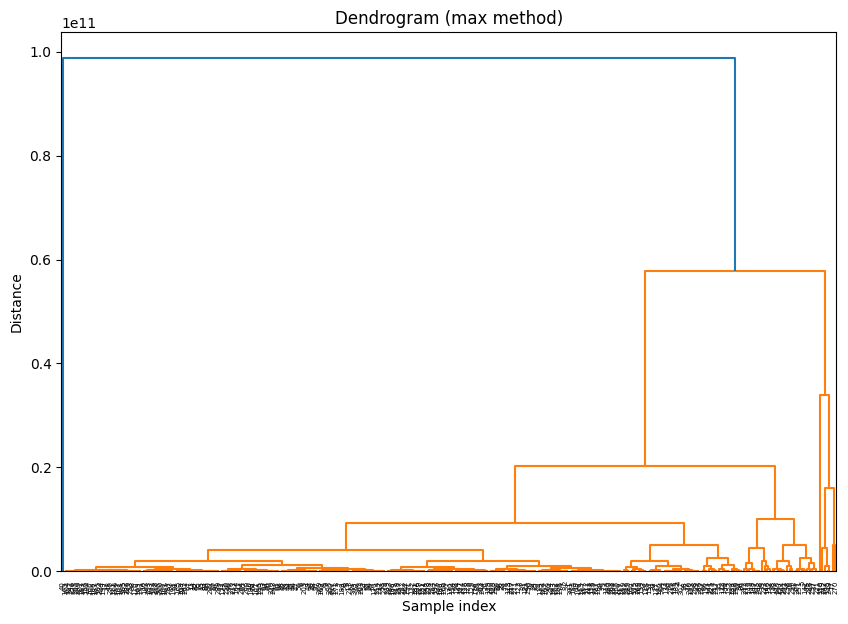

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming 'data_imputed' is your DataFrame with continuous variables
continuous_columns = ['Luas Tanah (m2)', 'Luas Bangunan (m2)', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Harga Penawaran (dari Owner)']

# Perform hierarchical/agglomerative clustering using the 'max' linkage method
Z = linkage(data_imputed[continuous_columns], method='complete')  # 'complete' is the 'max' method in linkage

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrogram (max method)")
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

Perform hierarchical clustering with the Euclidean distance metric and set the number of clusters equal to the number of clusters from the K-Means model.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
# Assuming 'data_imputed' is your DataFrame with continuous variables
continuous_columns = ['Luas Tanah (m2)', 'Luas Bangunan (m2)', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Harga Penawaran (dari Owner)']

# Perform K-Means clustering to get the number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)  # Assuming you found 3 clusters from the elbow method
data_imputed['KMeans'] = kmeans.fit_predict(data_imputed[continuous_columns])

# Perform hierarchical clustering using Euclidean distance (method='ward' uses Euclidean distance by default)
Z = linkage(data_imputed[continuous_columns], method='ward')  # 'ward' minimizes variance, similar to KMeans

# Cut the dendrogram to get the same number of clusters as K-Means
num_clusters = kmeans.n_clusters  # Number of clusters from K-Means
hierarchical_clusters = fcluster(Z, num_clusters, criterion='maxclust')

# Assign the hierarchical clustering labels to the dataset
data_imputed['Hierarchical_Cluster'] = hierarchical_clusters

# Display the clusters in the data
print(data_imputed[['Cluster', 'Hierarchical_Cluster']].head())

C:\Users\M.S.I\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\M.S.I\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


   Cluster  Hierarchical_Cluster
0        3                     1
1        2                     2
2        2                     1
3        3                     1
4        3                     1


Display the cluster summary in the form of a dataframe with the same criteria as the previous summary

In [ ]:
# Assuming 'data_imputed' has the hierarchical clustering labels ('Hierarchical_Cluster')
categorical_columns = ['Area Category', 'Terjual/Belum', 'Arah Hadap Rumah', 'Posisi Rumah', 'Lebar Jalan Depan Rumah (ROW)']
continuous_columns = ['Luas Tanah (m2)', 'Luas Bangunan (m2)', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Harga Penawaran (dari Owner)']

# First, we handle categorical columns and compute the mode
agglo_summary_categorical = data_imputed.groupby('Hierarchical_Cluster')[categorical_columns].agg(lambda x: x.mode()[0])

# Now handle continuous columns and compute the mean
agglo_summary_continuous = data_imputed.groupby('Hierarchical_Cluster')[continuous_columns].mean()

# Combine both categorical and continuous summaries
agglo_summary = pd.concat([agglo_summary_categorical, agglo_summary_continuous], axis=1)

# Add the count of data points in each cluster
agglo_summary['Count'] = data_imputed.groupby('Hierarchical_Cluster').size()

# Display the summary
print(agglo_summary)

                      Area Category  Terjual/Belum  Arah Hadap Rumah  \
Hierarchical_Cluster                                                   
1                                 1              0                 3   
2                                 3              0                 3   
3                                 3              0                 3   

                      Posisi Rumah  Lebar Jalan Depan Rumah (ROW)  \
Hierarchical_Cluster                                                
1                                2                              0   
2                                2                              0   
3                                2                              0   

                      Luas Tanah (m2)  Luas Bangunan (m2)  Jumlah Kamar  \
Hierarchical_Cluster                                                      
1                           93.522293           86.095541      4.165605   
2                           20.428571           16.214286      1.547

,Area Category,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
agglo,,,,,
0,2,1,3,2,2
1,2,1,3,2,2
2,3,1,3,2,2


In [ ]:
# Assuming 'data_imputed' has the hierarchical clustering labels ('Hierarchical_Cluster')
continuous_columns = ['Luas Tanah (m2)', 'Luas Bangunan (m2)', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Harga Penawaran (dari Owner)']

# Group by 'Hierarchical_Cluster' and calculate the mean for the continuous columns
agglo_summary = data_imputed.groupby('Hierarchical_Cluster')[continuous_columns].mean()

# Rename the index to 'agglo' for clarity
agglo_summary.index.name = 'agglo'

# Display the summary
print(agglo_summary)

       Luas Tanah (m2)  Luas Bangunan (m2)  Jumlah Kamar  Jumlah Kamar Mandi  \
agglo                                                                          
1            93.522293           86.095541      4.165605            3.229299   
2            20.428571           16.214286      1.547619            0.642857   
3            43.853211           38.256881      2.633028            1.669725   

       Harga Penawaran (dari Owner)  
agglo                                
1                         94.840764  
2                        137.738095  
3                         41.000000  


,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
agglo,,,,,,
0,511.848485,572.484848,6.030303,4.909091,1.954545,1.383303e+10
1,163.090361,218.156627,4.301205,3.451807,2.048193,3.094804e+09
2,119.026316,107.131579,2.697368,1.723684,1.289474,1.548517e+09


In [ ]:
agglo_count = data_imputed.groupby('Hierarchical_Cluster').size()

# Rename the index to 'agglo' for clarity
agglo_count.name = 'agglo'

# Display the count
agglo_count

Hierarchical_Cluster
1    157
2     42
3    109
Name: agglo, dtype: int64

,agglo
agglo,
0,66
1,166
2,76


**Hierarchical Visualization**

Single Linkage

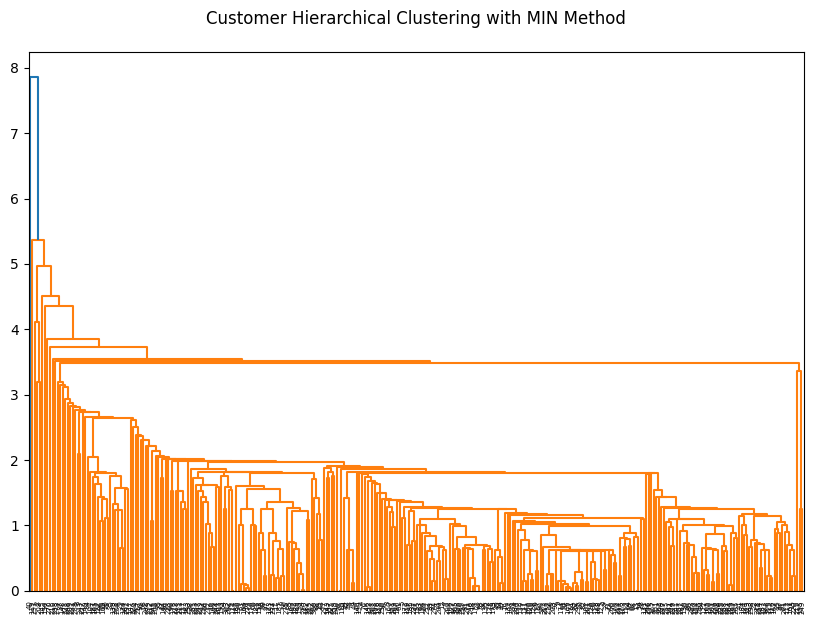

In [ ]:
# example
import scipy.cluster.hierarchy as hie

plt.figure(figsize=(10,7))
plt.title("Customer Hierarchical Clustering with MIN Method", pad=20)
dendro = hie.dendrogram(hie.linkage(df2, method="single"))

complete linkage

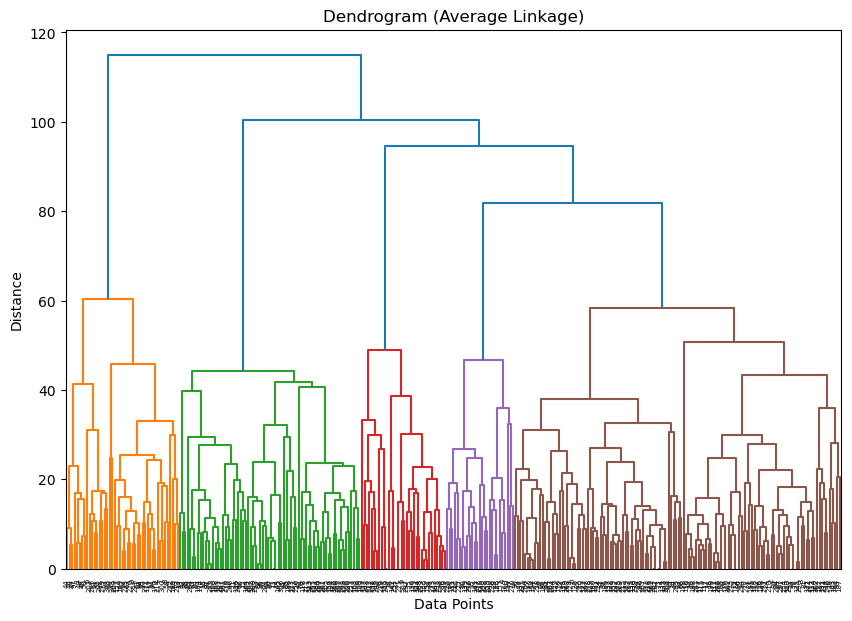

In [ ]:
# Perform hierarchical clustering using average linkage method
Z = linkage(data_imputed[continuous_columns], method='average')  # 'average' linkage method

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=data_imputed.index.tolist())
plt.title("Dendrogram (Average Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

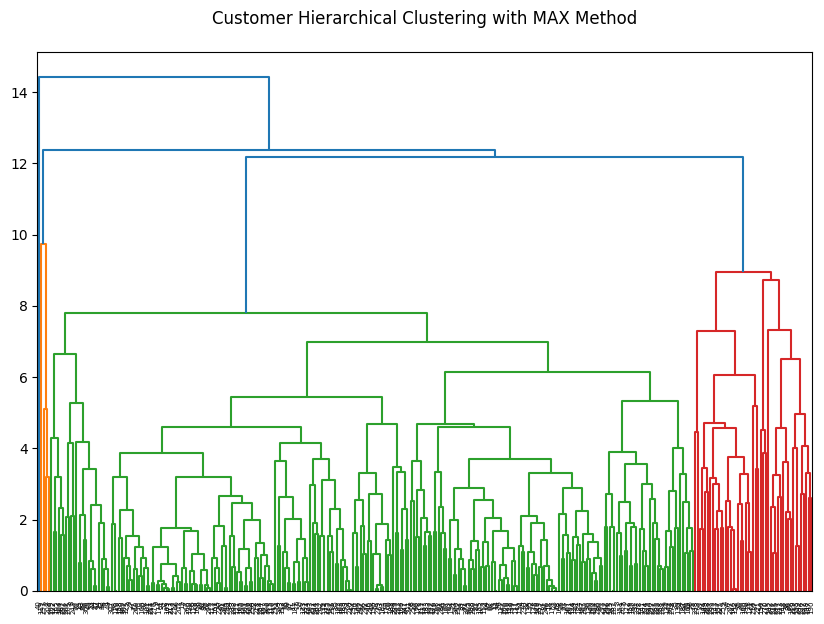

average linkage

C:\Users\M.S.I\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\M.S.I\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


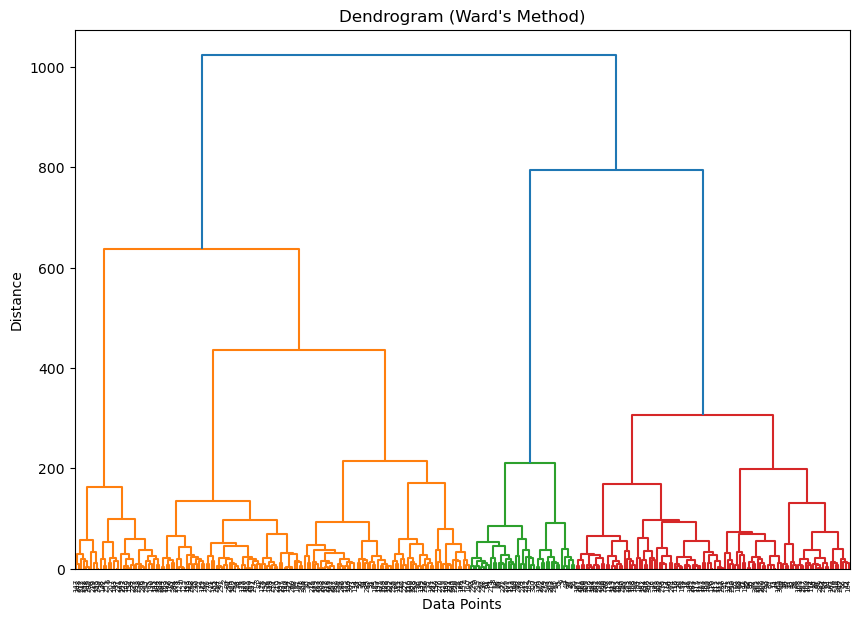

In [ ]:
# Perform K-Means clustering to get the number of clusters (if needed)
kmeans = KMeans(n_clusters=3, random_state=42)  # Assuming 3 clusters from previous steps
data_imputed['KMeans'] = kmeans.fit_predict(data_imputed[continuous_columns])

# Perform hierarchical clustering using Ward's method
Z = linkage(data_imputed[continuous_columns], method='ward')  # 'ward' linkage method

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=data_imputed.index.tolist())
plt.title("Dendrogram (Ward's Method)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

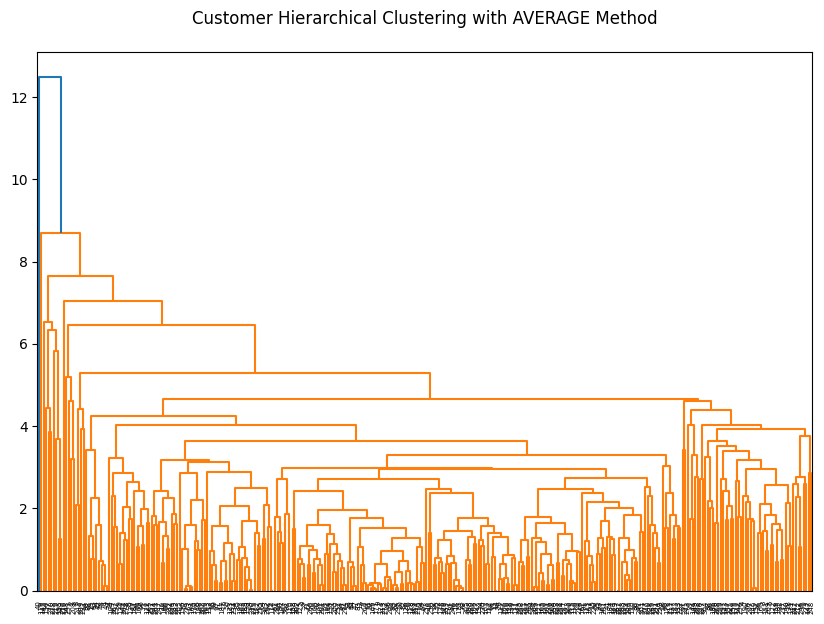

ward linkage

C:\Users\M.S.I\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\M.S.I\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


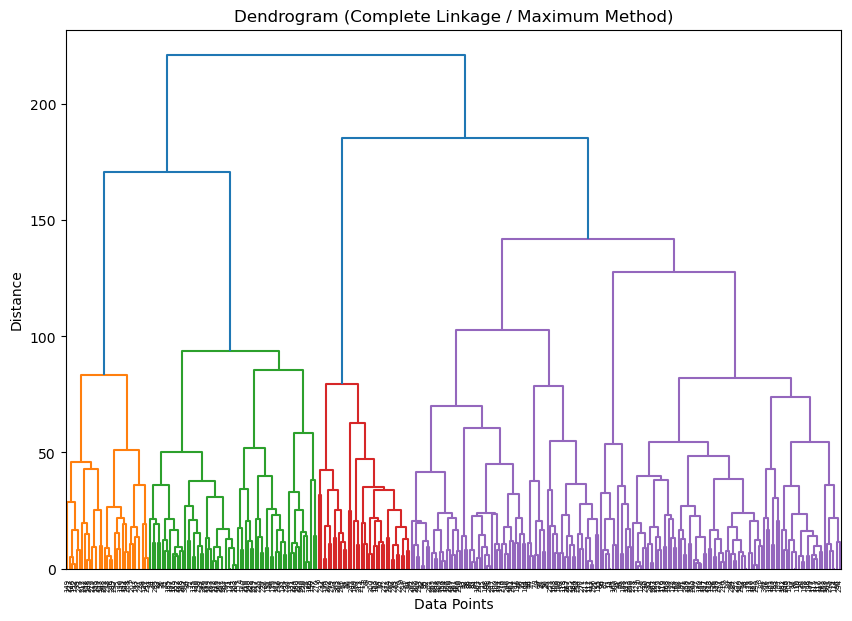

In [ ]:
# Perform K-Means clustering to get the number of clusters (if needed)
kmeans = KMeans(n_clusters=3, random_state=42)  # Assuming 3 clusters from previous steps
data_imputed['KMeans'] = kmeans.fit_predict(data_imputed[continuous_columns])

# Perform hierarchical clustering using maximum (complete) linkage method
Z = linkage(data_imputed[continuous_columns], method='complete')  # 'complete' linkage method

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=data_imputed.index.tolist())
plt.title("Dendrogram (Complete Linkage / Maximum Method)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

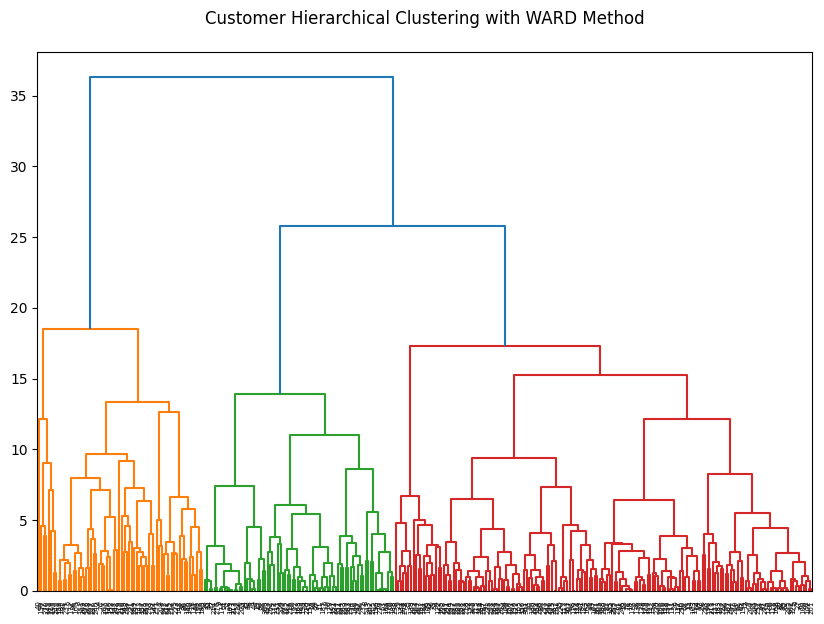